In [7]:
!wget -O CALTECH.zip https://zenodo.org/record/4126613/files/CALTECH.zip


--2023-06-17 12:00:28--  https://zenodo.org/record/4126613/files/CALTECH.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3808782 (3.6M) [application/octet-stream]
Saving to: ‘CALTECH.zip’

CALTECH.zip         100%[===================>]   3.63M   592KB/s    in 6.4s    

2023-06-17 12:00:36 (583 KB/s) - ‘CALTECH.zip’ saved [3808782/3808782]



In [8]:
!unzip CALTECH.zip

Archive:  CALTECH.zip
   creating: CALTECH/
   creating: CALTECH/CALTECH_Annotations/
   creating: CALTECH/CALTECH_Annotations/butterfly/
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0001.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0003.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0004.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0005.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0006.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0007.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0008.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0009.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0010.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0011.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotation_0012.mat  
  inflating: CALTECH/CALTECH_Annotations/butterfly/annotati

In [9]:
B_path='/content/CALTECH/CALTECH_Annotations/butterfly/annotation_0001.mat'

In [10]:
from scipy.io import loadmat

In [11]:
mat=loadmat(B_path)

In [12]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Dec 20 14:17:33 2004',
 '__version__': '1.0',
 '__globals__': [],
 'box_coord': array([[ 11, 188,   3, 284]], dtype=uint16),
 'obj_contour': array([[145.9395466 , 167.24937028, 196.7279597 , 234.73047859,
         256.39546599, 274.50881612, 277.35012594, 263.14357683,
         256.75062972, 247.16120907, 244.67506297, 233.30982368,
         246.45088161, 243.25440806, 229.7581864 , 208.44836272,
         185.00755668, 144.16372796, 142.74307305, 140.61209068,
         138.83627204, 136.70528967,  96.92695214,  82.01007557,
          58.56926952,  42.58690176,  33.70780856,  35.4836272 ,
          44.71788413,  34.77329975,  33.35264484,  24.82871537,
          23.05289673,   9.55667506,   1.38790932,   2.80856423,
          10.62216625,  28.38035264,  65.31738035,  90.88916877,
         115.75062972, 134.5743073 , 135.63979849, 134.21914358,
         136.70528967, 133.15365239, 121.7884131 , 107.93702771,
         

In [13]:
mat['box_coord'][0]

array([ 11, 188,   3, 284], dtype=uint16)

In [14]:
import matplotlib.pyplot as plt
import cv2
from scipy.io import loadmat

In [15]:
def extract_mat(annotation_dir):
  height,width=cv2.imread(img_dir).shape[:2]
  mat=loadmat(annotation_dir)

  return mat['box_coord'][0]



In [16]:
d_path='/content/CALTECH/CALTECH_Annotations/butterfly/annotation_0001.mat'

In [17]:
x,y=cv2.imread('/content/CALTECH/CALTECH_Dataset/butterfly/image_0001.jpg').shape[:2]
print(x,y)

198 300


In [18]:
img_dir = '/content/CALTECH/CALTECH_Dataset/butterfly/image_0001.jpg'

In [19]:
img_dir.split('/')

['', 'content', 'CALTECH', 'CALTECH_Dataset', 'butterfly', 'image_0001.jpg']

In [20]:
def extract_mat(annotation_dir,img_dir):
  height,width=cv2.imread(img_dir).shape[:2]
  mat=loadmat(annotation_dir)
  class_name=img_dir.split('/')[4]
  file_name=img_dir
  return file_name,width,height,class_name,mat['box_coord'][0]

In [21]:
extract_mat(d_path,img_dir)

('/content/CALTECH/CALTECH_Dataset/butterfly/image_0001.jpg',
 300,
 198,
 'butterfly',
 array([ 11, 188,   3, 284], dtype=uint16))

In [22]:
path = "/content/CALTECH/CALTECH_Annotations/" + "butterfly"

In [23]:
import os

In [24]:
os.listdir(path)

['annotation_0049.mat',
 'annotation_0090.mat',
 'annotation_0070.mat',
 'annotation_0026.mat',
 'annotation_0065.mat',
 'annotation_0047.mat',
 'annotation_0048.mat',
 'annotation_0044.mat',
 'annotation_0038.mat',
 'annotation_0034.mat',
 'annotation_0059.mat',
 'annotation_0046.mat',
 'annotation_0006.mat',
 'annotation_0023.mat',
 'annotation_0073.mat',
 'annotation_0054.mat',
 'annotation_0027.mat',
 'annotation_0078.mat',
 'annotation_0062.mat',
 'annotation_0012.mat',
 'annotation_0036.mat',
 'annotation_0031.mat',
 'annotation_0042.mat',
 'annotation_0051.mat',
 'annotation_0053.mat',
 'annotation_0076.mat',
 'annotation_0037.mat',
 'annotation_0010.mat',
 'annotation_0084.mat',
 'annotation_0029.mat',
 'annotation_0015.mat',
 'annotation_0001.mat',
 'annotation_0017.mat',
 'annotation_0057.mat',
 'annotation_0064.mat',
 'annotation_0082.mat',
 'annotation_0063.mat',
 'annotation_0020.mat',
 'annotation_0019.mat',
 'annotation_0008.mat',
 'annotation_0050.mat',
 'annotation_000

In [25]:
import pandas as pd
def mat_to_df(annotation_dirs, img_dirs, classes):
    mat_list = []
    for class_ in classes:
        img_dir = os.path.join(img_dirs, class_)
        annot_dir = os.path.join(annotation_dirs, class_)

        img_files = os.listdir(img_dir)
        mat_files = os.listdir(annot_dir)

        for mat_file, img_file in zip(mat_files, img_files):
            mat_path = os.path.join(annot_dir,mat_file)
            img_path = os.path.join(img_dir,img_file)

            value = extract_mat(mat_path, img_path)

            mat_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'annot']

    mat_df = pd.DataFrame(mat_list, columns=column_name)

    return mat_df

In [26]:
classes=['butterfly']
img_dirs='/content/CALTECH/CALTECH_Dataset/'
annotation_dirs='/content/CALTECH/CALTECH_Annotations/'
mat_list = []
for class_ in classes:
    img_dir = os.path.join(img_dirs, class_)
    annot_dir = os.path.join(annotation_dirs, class_)

    img_files = os.listdir(img_dir)
    mat_files = os.listdir(annot_dir)

    for mat_file, img_file in zip(mat_files, img_files):
        mat_path = os.path.join(annot_dir,mat_file)
        img_path = os.path.join(img_dir,img_file)

        value = extract_mat(mat_path, img_path)
        print(value)
        break

('/content/CALTECH/CALTECH_Dataset/butterfly/image_0071.jpg', 300, 257, 'butterfly', array([ 61, 210,  59, 292], dtype=uint16))


In [27]:
classes=['butterfly', 'cougar_face', 'elephant']

In [28]:
mat_df = mat_to_df('/content/CALTECH/CALTECH_Annotations/', '/content/CALTECH/CALTECH_Dataset/', ['butterfly', 'cougar_face', 'elephant'])

In [29]:
mat_df.head()

,filename,width,height,class,annot
0,/content/CALTECH/CALTECH_Dataset/butterfly/ima...,300,257,butterfly,"[61, 210, 59, 292]"
1,/content/CALTECH/CALTECH_Dataset/butterfly/ima...,300,225,butterfly,"[29, 187, 19, 241]"
2,/content/CALTECH/CALTECH_Dataset/butterfly/ima...,299,282,butterfly,"[35, 199, 35, 283]"
3,/content/CALTECH/CALTECH_Dataset/butterfly/ima...,297,300,butterfly,"[27, 205, 42, 256]"
4,/content/CALTECH/CALTECH_Dataset/butterfly/ima...,300,225,butterfly,"[38, 250, 40, 288]"


In [30]:
import imgaug.augmenters as iaa

In [31]:
image_aug  = iaa.SomeOf(2, [iaa.Affine(scale=(0.7, 1.3)), iaa.Affine(rotate=(-15, 15)), iaa.Fliplr(1), iaa.GaussianBlur(sigma=(1.0, 2.0))])

In [32]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [33]:
import imgaug as ia
image = ia.quokka(size=(256, 256))
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=65, y1=100, x2=200, y2=150),
    BoundingBox(x1=150, y1=80, x2=200, y2=130)
], shape=image.shape)

seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)), # change brightness, doesn't affect BBs
    iaa.Affine(
        translate_px={"x": 40, "y": 60},
        scale=(0.5, 0.7)
    ) # translate by 40/60px on x/y axis, and scale to 50-70%, affects BBs
])

# Augment BBs and images.
image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)

In [34]:
bbs

BoundingBoxesOnImage([BoundingBox(x1=65.0000, y1=100.0000, x2=200.0000, y2=150.0000, label=None), BoundingBox(x1=150.0000, y1=80.0000, x2=200.0000, y2=130.0000, label=None)], shape=(256, 256, 3))

In [35]:
bbs_aug

BoundingBoxesOnImage([BoundingBox(x1=129.6051, y1=170.9356, x2=211.8799, y2=201.4077, label=None), BoundingBox(x1=181.4077, y1=158.7467, x2=211.8799, y2=189.2189, label=None)], shape=(256, 256, 3))

In [37]:
import imageio
def img_augmentor(df, image_path, aug_image_path, augmentor, multiple=3):
    aug_df = pd.DataFrame(column_name = ['filename', 'width', 'height', 'class', 'annot'])

    grouped_df = df.groupby('filename')

    if not os.path.exists(aug_image_path):
        os.mkdir(aug_image_path)

    for folder in df['class'].unique():
        if not os.path.exists(os.path.join(aug_image_path, folder)):
            os.mkdir(os.path.join(aug_image_path, folder))
    for i in range(multiple):
        img_postfix = str(i)
        for filename in df['filename'].unique():
            img_aug_path = os.path.join(aug_image_path, filename.split('/')[-1].split('.')[0]) + '_' + img_postfix + '.jpg'
            g_img = grouped_df.get_group(filename)
            g_img = g_img.reset_index()
            g_img = g_img.drop(['index'], axis=1)

            img = imageio.imread(os.path.join(filename))

            bounding_box = g_img.drop(['filename', 'width', 'height', 'class'], axis=1).values
            bb = BoundingBoxesOnImage.from_xyxy_array(bounding_box, shape=img.shape)
            img_aug, bb_aug_ = augmentor(image=img, bounding_boxes=bb)

            bb_aug = bb_aug_.remove_out_of_image()



In [39]:
img = cv2.imread(mat_df.iloc[2]['filename'])

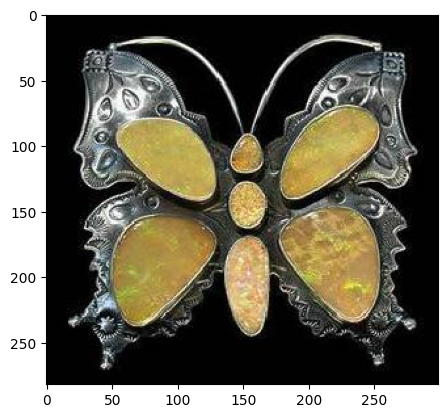

In [40]:
plt.imshow(img)

In [41]:
mat_df.iloc[2]['annot']

array([ 35, 199,  35, 283], dtype=uint16)

In [75]:
img = cv2.imread(mat_df.iloc[11]['filename'])
y1 , x2 , x1, y2 = mat_df.iloc[11]['annot']

In [76]:
img_ant =  cv2.rectangle(img,(x1,y1), (x2,y2),(0,255,0))

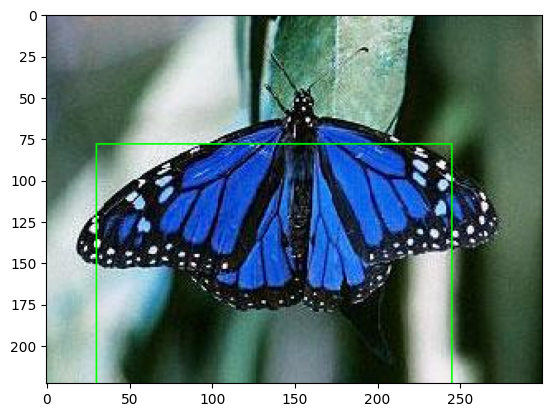

In [77]:
plt.imshow(img_ant)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.applications import resnet50

In [ ]:
base_model = resnet50.ResNet50(weights='imagenet', include_top=False, pooling='max')

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
output_base_model = base_model.output

classification = Dense(3, activation='softmax')(output_base_model)
bounding_box = Dense(4, activation='sigmoid')(output_base_model)

model = Model(inputs=base_model.input, outputs=[classification, bounding_box])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import UpSampling2D, Conv2DTranspose

In [ ]:
model = Sequential()
model.add(UpSampling2D(size=(2,2), interpolation='nearest', input_shape=(2,2,1)))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_2 (UpSampling  (None, 4, 4, 1)          0         
 2D)                                                             
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred = model.predict(inp)

1/1 [==============================] - 0s 25ms/step


In [ ]:
pred

array([[[[0.],
         [0.],
         [1.],
         [1.]],

        [[0.],
         [0.],
         [1.],
         [1.]],

        [[2.],
         [2.],
         [3.],
         [3.]],

        [[2.],
         [2.],
         [3.],
         [3.]]]], dtype=float32)

In [ ]:
model = Sequential()
model.add(UpSampling2D(size=(3,3), interpolation='nearest', input_shape=(2,2,1)))

In [ ]:
pred = model.predict(inp)

1/1 [==============================] - 0s 56ms/step


In [ ]:
pred

array([[[[0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.]],

        [[0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.]],

        [[0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.]],

        [[2.],
         [2.],
         [2.],
         [3.],
         [3.],
         [3.]],

        [[2.],
         [2.],
         [2.],
         [3.],
         [3.],
         [3.]],

        [[2.],
         [2.],
         [2.],
         [3.],
         [3.],
         [3.]]]], dtype=float32)

In [ ]:
model = Sequential()
model.add(UpSampling2D(size=(3,3), interpolation='bilinear', input_shape=(2,2,1)))

In [ ]:
pred = model.predict(inp)

1/1 [==============================] - 0s 65ms/step


In [ ]:
pred

array([[[[0.        ],
         [0.        ],
         [0.33333337],
         [0.66666675],
         [1.        ],
         [1.        ]],

        [[0.        ],
         [0.        ],
         [0.33333337],
         [0.66666675],
         [1.        ],
         [1.        ]],

        [[0.66666675],
         [0.66666675],
         [1.0000001 ],
         [1.3333335 ],
         [1.6666667 ],
         [1.6666667 ]],

        [[1.3333335 ],
         [1.3333335 ],
         [1.6666669 ],
         [2.0000002 ],
         [2.3333335 ],
         [2.3333335 ]],

        [[2.        ],
         [2.        ],
         [2.3333335 ],
         [2.6666667 ],
         [3.        ],
         [3.        ]],

        [[2.        ],
         [2.        ],
         [2.3333335 ],
         [2.6666667 ],
         [3.        ],
         [3.        ]]]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2DTranspose(filters=1, kernel_size=(2,2), strides=(1,1),input_shape=(2,2,1)))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 3, 3, 1)          5         
 nspose)                                                         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[[[ 0.5926767 ]],
 
         [[ 0.24530512]]],
 
 
        [[[-0.78063184]],
 
         [[ 0.50584465]]]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
inp

array([[[0, 1],
        [2, 3]]])

In [ ]:
pred = model.predict(inp)

1/1 [==============================] - 0s 143ms/step


In [ ]:
pred

array([[[[ 0.        ],
         [ 0.5926767 ],
         [ 0.24530512]],

        [[ 1.1853534 ],
         [ 1.4880085 ],
         [ 1.24176   ]],

        [[-1.5612637 ],
         [-1.3302063 ],
         [ 1.517534  ]]]], dtype=float32)

In [ ]:
2*0.50584465 + -0.78063184*3

-1.33020622